## chisqr test 

In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt



import sys
sys.path.append('/n/des/lee.5922/programs/cosmolike/MG_musigma/')
sys.path.append('/n/des/lee.5922/Dropbox/repositories/bandpower/SNR/')
from noshellavg import *
from run_error_analysis import *
from plot_chain import plot_single, plot_triple
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
def initialize(param_file = None):
    
    import yaml
    
    params = yaml.load(open(param_file))
    kmin, kmax, kN = params['k']
    rmin, rmax, rN = params['r']
    logscale = params['logscale']
    KMIN, KMAX = 1e-3, 2.
    lmax = params['lmax']
    parameter_ind = params['parameter_ind']  
    #parameter_ind_xi = params['parameter_ind_xi'] 

    b = 2.002
    #if 'b' in params: b = params['b']
    f = 0.745
    #if 'f' in params: f = params['f']
    s = 3.5
    if 's' in params: s = params['s']
    nn = 3.0e-04
    if 'nn' in params: nn = params['nn']
    parameter_names = np.array(['b', 'f', 's', 'nn'])

    print '-----------------------------------'
    print ' Run Error Analaysis'
    print '-----------------------------------'
    print ' parameter setting'
    print ' b={} f={} s={} nn={}'.format(b,f,s,nn)
    print ' free params :'+ str(parameter_names[parameter_ind]) 
    print ' k = [{}, {}], kN={}'.format(kmin, kmax, kN)
    print ' r = [{}, {}], rN={}'.format(rmin, rmax, rN)
    print ' lmax={}'.format(lmax)
    print '-----------------------------------'

    RSDPower = NoShell_covariance(KMIN, KMAX, rmin, rmax, 2**12 + 1, 
                                  rN, kN, b,f,s,nn,logscale = logscale)
    datavP = P_multipole(RSDPower)
    datavXi = Xi_multipole(RSDPower)
    datav = np.hstack([datavP, datavXi])
    return params, RSDPower, datav

In [14]:
params, RSDPower, datav = initialize(param_file = '../yaml/test_bfs_k0_02_kN200_r18_180_rN162_p0.yaml')

-----------------------------------
 Run Error Analaysis
-----------------------------------
 parameter setting
 b=2.002 f=0.745 s=3.5 nn=0.0003
 free params :['b' 'f' 's']
 k = [0.001, 0.2], kN=400
 r = [0.001, 200], rN=50
 lmax=0
-----------------------------------


In [15]:
#RSDPower.covariance_Xi_all()
Cpxi00_orig = RSDPower.covariance_PXi(0,0)
#Cpxi00_fromcxi = RSDPower.covariance_PXi_from_Cxi(2,2)

Cp00 = RSDPower.covariance_PP(0,0)
RSDPower.covariance_Xi_all()
Cx00_orig = RSDPower.covariance00

cov_P  : multiprocessing 100 % 
cov_Xi : multiprocessing 100 %

In [39]:
RSDPower.kcenter_y[70]


In [34]:
Ctot0.shape, datav.shape

((129, 129), (1344,))

In [75]:
PP = datav[:80]
m1, m2 = np.mgrid[0:80, 0:80]
PPmatrix = PP[m1] * PP[m2]

mm1, mm2 = np.mgrid[0:80, 0:49]
PP1 = PP[mm1]

In [ ]:
PP[]

In [78]:

Cpxi00 = np.fliplr(Cpxi00_orig)
Cx00 = np.flipud(np.fliplr(Cx00_orig))
Ctot0 = np.vstack((np.hstack((Cp00[:80,:80]*1./PPmatrix, Cpxi00[:80,:] *1./PP1)), 
                  np.hstack((Cpxi00[:80,:].T *1./PP, Cx00)) ))

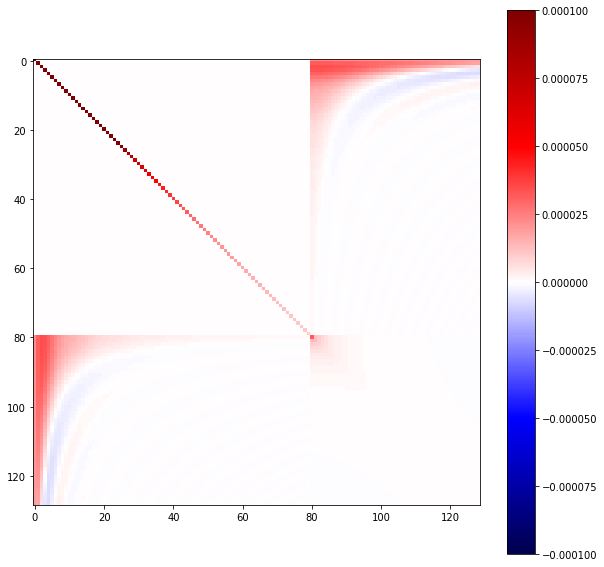

In [79]:
from utils import *
fig, ax = plt.subplots(figsize = (10,10))
#im = ax.imshow( np.log10(Cpxi))
#im = ax.imshow( Cp00[:80,:80] * PP**2, vmin = -0.0001, vmax = 0.0001, cmap='seismic')
im = ax.imshow( Ctot0, vmin = -0.0001, vmax = 0.0001, cmap='seismic')
#im = ax.imshow( correlation_matrix(Ctot0), vmin=-1, vmax=1, cmap='seismic', interpolation='none')
fig.colorbar(im,ax=ax)

(-0.01, 0.01)

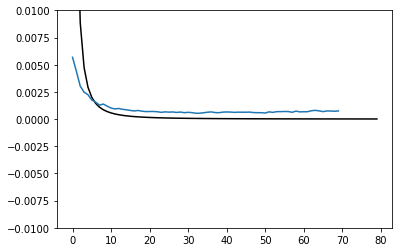

In [62]:
fig, ax = plt.subplots()

ax.plot( np.arange(80), Cp00[:80,:80].diagonal()*1./PP**2, 'k-')
ax.plot( np.arange(70), Ashley_mat.diagonal()[:70])

#ax.set_xlim(10,)


ax.set_ylim(-0.01, .01)

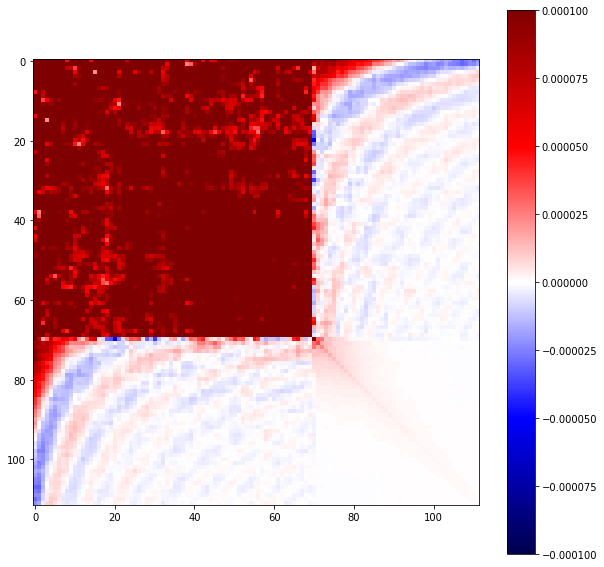

In [80]:
Ashley_mat = np.genfromtxt('../Ashley_mat.dat')
from utils import *
fig, ax = plt.subplots(figsize = (10,10))
#im = ax.imshow( np.log10(Cpxi))
im = ax.imshow( Ashley_mat, vmin = -0.0001, vmax = 0.0001, cmap='seismic', interpolation='none')
#im = ax.imshow( correlation_matrix(Ashley_mat), vmin=-1, vmax=1, cmap='seismic')
fig.colorbar(im,ax=ax)


In [21]:
Cpxi = np.vstack((np.hstack((Cpxi00, Cpxi02, Cpxi04)), 
                  np.hstack((Cpxi20, Cpxi22, Cpxi24)), 
                  np.hstack((Cpxi40, Cpxi42, Cpxi44))))

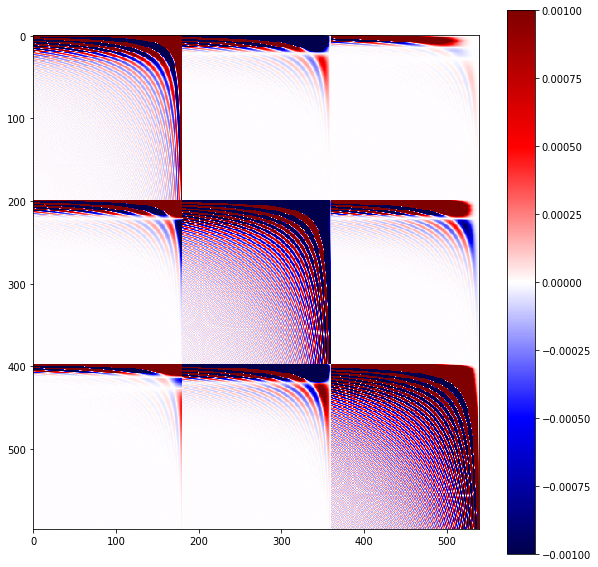

In [33]:
fig, ax = plt.subplots(figsize = (10,10))
#im = ax.imshow( np.log10(Cpxi))
im = ax.imshow( Cpxi, vmin = -0.001, vmax = 0.001, cmap='seismic')
fig.colorbar(im,ax=ax)

In [7]:
Cpxi00

array([[ -2.50996828e-01,  -2.48660767e-01,  -2.46328289e-01, ...,
         -6.02873320e-05,  -2.36633493e-05,  -5.15771999e-06],
       [ -7.83552879e-01,  -7.81802814e-01,  -7.79951686e-01, ...,
         -3.33047555e-04,  -1.30732659e-04,  -2.84957200e-05],
       [ -2.94250384e-01,  -3.02010846e-01,  -3.09698641e-01, ...,
         -5.47432354e-04,  -2.14912126e-04,  -4.68471358e-05],
       ..., 
       [ -2.91231681e-08,  -3.82585359e-08,   5.97017436e-08, ...,
          2.65795308e-06,   6.61370851e-06,   2.70972184e-06],
       [  5.77148175e-08,  -3.76939895e-08,  -2.78623793e-08, ...,
          2.51159816e-06,   6.50062114e-06,   2.68292673e-06],
       [  1.83171002e-09,   5.27346249e-08,  -4.54995450e-08, ...,
          2.36944506e-06,   6.38878484e-06,   2.65627089e-06]])

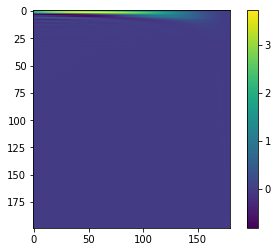

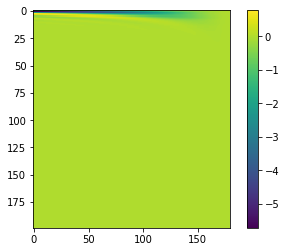

In [33]:
fig, ax = plt.subplots()
im = ax.imshow(Cpxi00_fromcxi)
fig.colorbar(im,ax=ax)
fig, ax = plt.subplots()
im=ax.imshow(Cpxi00)
fig.colorbar(im,ax=ax)

In [ ]:
mask = np.array(np.genfromtxt('data_txt/datav/mcmc_testscale_combined_bfs_p02.mask'), dtype=bool)
datav_fid = np.genfromtxt('data_txt/datav/mcmc_testscale_combined_bfs_p02.datavector')[mask]
datav = datav[mask]
fisher = np.genfromtxt('data_txt/cov/test_bfs_k0_02_kN200_r18_180_rN162_p02_fishertot.fisher')

In [ ]:
mask.shape, datav.shape

In [67]:
mask = np.array(np.genfromtxt('data_txt/datav/mcmc_default_combined_bfs_p02.mask'), dtype=bool)
datav_fid = np.genfromtxt('data_txt/datav/mcmc_default_combined_bfs_p02.datavector')[mask]
datav = datav[mask]
fisher = np.genfromtxt('data_txt/cov/default_kN200_ke-3_rN180_re-3_bfs_p02_fishertot.fisher')

In [68]:
chisqrlist = []
difflist=[]
for i in range(datav.size):
    for j in range(datav.size):
        chi = (datav[i]-datav_fid[i]) * (datav[j]-datav_fid[j]) * fisher[i][j]
        diff = (datav[i]-datav_fid[i]) * (datav[j]-datav_fid[j])
        difflist.append(diff)
        chisqrlist.append(chi)
        

In [69]:
chisqr = np.array(chisqrlist).reshape(datav.size, datav.size)
chisqr_sum = np.sum(chisqr)

In [80]:
ind = np.argwhere( chisqr > 100.)
ind.shape

(2158, 2)

In [81]:
emptymat = np.zeros((datav.size, datav.size))
for i in range(ind.shape[0]):
    indx, indy = ind[i]
    emptymat[indx][indy] = 1.0

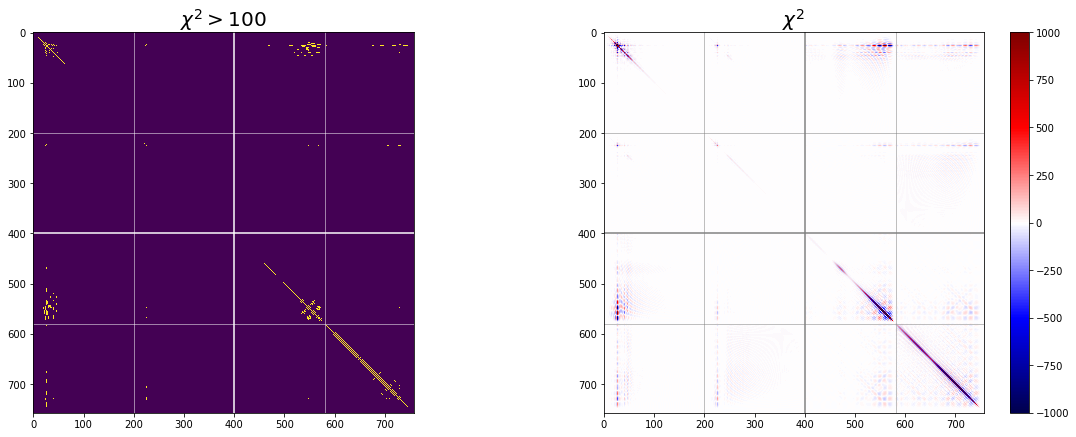

In [93]:
fig, (ax, ax2) = plt.subplots(1,2,figsize=(20,7))
im = ax.imshow(emptymat, interpolation = 'none')

ax.axhline(y = 200, color = 'w', lw=0.5)
ax.axvline(x = 200, color = 'w', lw=0.5)

ax.axhline(y = 581, color = 'w', lw=0.5)
ax.axvline(x = 581, color = 'w', lw=0.5)

ax.axhline(y = 400, color = 'w', lw=1.5)
ax.axvline(x = 400, color = 'w', lw=1.5)
ax.set_title(r'$\chi^2 > 100$', fontsize = 20)

im2 = ax2.imshow(chisqr, interpolation = 'none', vmin = -1000, vmax = 1000, cmap='seismic')
ax2.axhline(y = 200, color = 'grey', lw=0.5)
ax2.axvline(x = 200, color = 'grey', lw=0.5)

ax2.axhline(y = 581, color = 'grey', lw=0.5)
ax2.axvline(x = 581, color = 'grey', lw=0.5)

ax2.axhline(y = 400, color = 'grey', lw=1.5)
ax2.axvline(x = 400, color = 'grey', lw=1.5)
ax2.set_title(r'$\chi^2$', fontsize = 20)

#ax.grid(which='minor', color='w', linestyle='-', linewidth=1)
#fig.colorbar(im, ax=ax)
fig.colorbar(im2, ax=ax2)



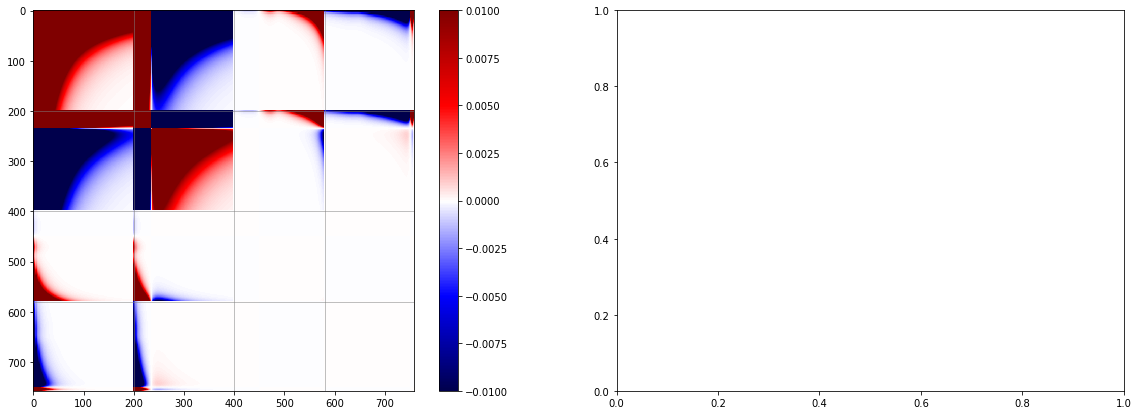

In [200]:
diffmat = np.array(difflist).reshape(datav.size, datav.size)

fig, (ax, ax2) = plt.subplots(1,2,figsize=(20,7))
im = ax.imshow(diffmat, interpolation = 'none', vmin = -.01, vmax = .01, cmap='seismic')

ax.axhline(y = 200, color = 'grey', lw=0.5)
ax.axvline(x = 200, color = 'grey', lw=0.5)

ax.axhline(y = 581, color = 'grey', lw=0.5)
ax.axvline(x = 581, color = 'grey', lw=0.5)

ax.axhline(y = 400, color = 'grey', lw=.5)
ax.axvline(x = 400, color = 'grey', lw=.5)


#ax.grid(which='minor', color='w', linestyle='-', linewidth=1)
fig.colorbar(im, ax=ax)

In [180]:
diffmat.max(), np.mean(diffmat)

(288020.80126986804, 30.414762599923794)

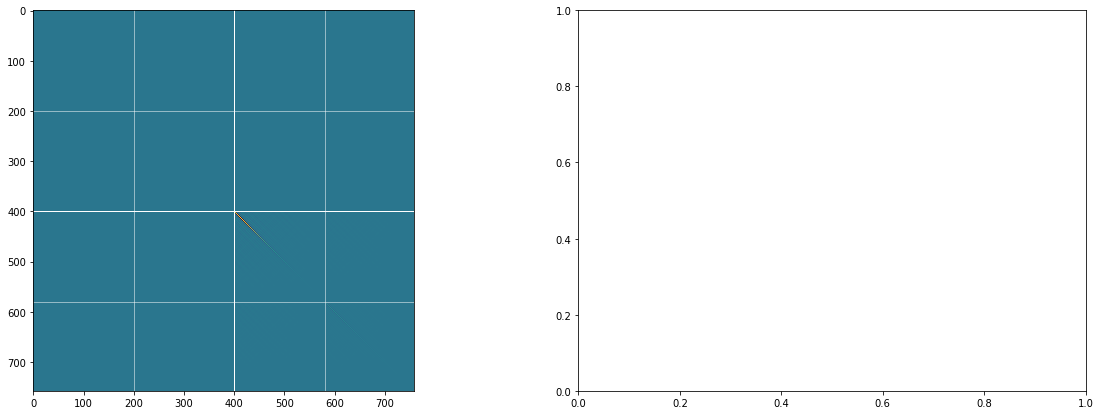

In [156]:
fig, (ax, ax2) = plt.subplots(1,2,figsize=(20,7))
im = ax.imshow(fisher, interpolation = 'none')

ax.axhline(y = 200, color = 'w', lw=0.5)
ax.axvline(x = 200, color = 'w', lw=0.5)

ax.axhline(y = 581, color = 'w', lw=0.5)
ax.axvline(x = 581, color = 'w', lw=0.5)

ax.axhline(y = 400, color = 'w', lw=1)
ax.axvline(x = 400, color = 'w', lw=1)

/n/home00/lee.5922/.local/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/n/home00/lee.5922/.local/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log10
  


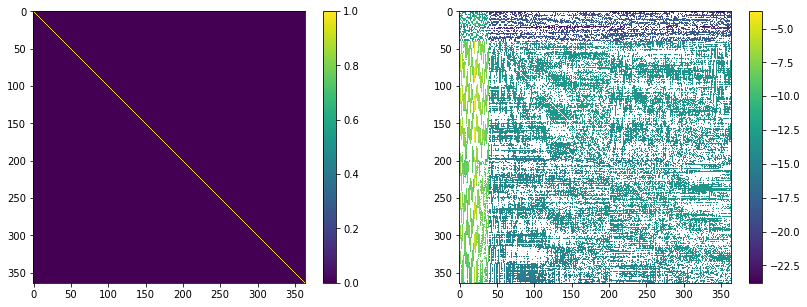

In [97]:
sanity_check = np.genfromtxt('data_txt/cov/sanity_check.txt')

fig, (ax, ax2) = plt.subplots(1,2, figsize=(14, 5))
im = ax.imshow(sanity_check)
fig.colorbar(im, ax=ax)

np.fill_diagonal(sanity_check, 0)
im2 = ax2.imshow(np.log10(sanity_check))
fig.colorbar(im2, ax=ax2)